In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SeparableConv2D, ReLU,GlobalMaxPool2D
from tensorflow.keras.layers import Activation,Dense, Flatten, BatchNormalization, Conv2D, Dropout,LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model 
import warnings
warnings.simplefilter(action ='ignore', category = FutureWarning)
%matplotlib inline


In [ ]:
mob_model = keras.applications.MobileNet(weights=None)

In [ ]:
mob_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
model_mod = mob_model.layers[-2].output
prediction = keras.layers.Dense(7, activation='softmax')(model_mod)

In [ ]:
final_model = keras.Model(inputs = mob_model.input, outputs = prediction)


In [ ]:
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

# **Import Data**

In [ ]:
train_path = '/content/drive/MyDrive/dataset/train'
valid_path = '/content/drive/MyDrive/dataset/validate'
test_path = '/content/drive/MyDrive/dataset/test'

In [ ]:
train_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory = train_path, target_size=(224,224),batch_size=32)
valid_batch =ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory( directory = valid_path, target_size=(224,224), batch_size=32)
test_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory = test_path, target_size=(224,224), batch_size=32, shuffle=False )

Found 3584 images belonging to 7 classes.
Found 896 images belonging to 7 classes.
Found 1120 images belonging to 7 classes.


In [ ]:
imgs, labels = next(train_batch)
y = labels

In [ ]:
# plot images in the form of grid with 1 row and 10 colomuns 
def plotImages(images_arr):
    fig, axes = plt.subplots(1,8 , figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


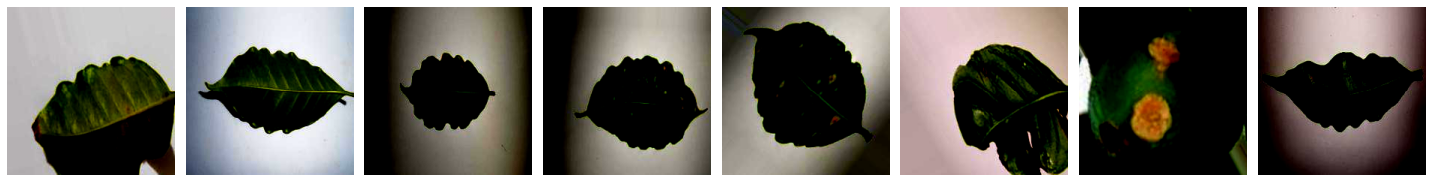

[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

# Train Model

In [ ]:
#sethyper parameters
Epoch = 100
FC_layers = 1024
Dropout_rate = 0.5
Batch_size = 32

In [ ]:
opt = tf.keras.optimizers.SGD(
    learning_rate=0.0001,
    momentum=0.9,
    name="SGD",
)

In [ ]:
#optimizer=keras.optimizers.SGD(lr=0.0005)
final_model.compile(optimizer=opt, loss ='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#run for more epochs(~30) to get better result steps_per_epoch train batch to complete one epoch
history=final_model.fit(x=train_batch, validation_data=valid_batch, epochs=Epoch, verbose=1)

Epoch 1/100
112/112 [==============================] - 2766s 25s/step - loss: 1.8843 - accuracy: 0.2637 - val_loss: 1.9810 - val_accuracy: 0.1429
Epoch 2/100
112/112 [==============================] - 38s 342ms/step - loss: 1.4745 - accuracy: 0.4185 - val_loss: 2.1046 - val_accuracy: 0.1429
Epoch 3/100
112/112 [==============================] - 38s 342ms/step - loss: 1.2646 - accuracy: 0.5224 - val_loss: 2.3053 - val_accuracy: 0.1429
Epoch 4/100
112/112 [==============================] - 39s 345ms/step - loss: 1.1130 - accuracy: 0.5696 - val_loss: 2.6545 - val_accuracy: 0.1429
Epoch 5/100
112/112 [==============================] - 39s 347ms/step - loss: 0.9634 - accuracy: 0.6542 - val_loss: 3.6380 - val_accuracy: 0.1429
Epoch 6/100
112/112 [==============================] - 39s 348ms/step - loss: 0.8588 - accuracy: 0.6746 - val_loss: 4.7900 - val_accuracy: 0.1440
Epoch 7/100
112/112 [==============================] - 39s 345ms/step - loss: 0.7861 - accuracy: 0.7019 - val_loss: 3.5378 -

In [ ]:
np.mean(history.history['accuracy'])

0.9041629439592361

In [ ]:
np.mean(history.history['val_accuracy'])

In [ ]:
np.mean(history.history['loss'])

In [ ]:
np.mean(history.history['val_loss'])

**plot result**

In [ ]:
# list all data in history
print(history.history.keys())

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower right')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()

In [ ]:
prediction = mobile_model.predict(x=test_batch, verbose = 1)

In [ ]:
cm = confusion_matrix(y_true=test_batch.classes, y_pred = np.argmax(prediction,axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

Confusion matrix, without normalization
[[160   0   0   0   0   0   0]
 [ 12 148   0   0   0   0   0]
 [  0   0 155   2   3   0   0]
 [  0   0   0 160   0   0   0]
 [  0   0   5   3 152   0   0]
 [  0   0  10   6   0 144   0]
 [  0   0   0   0   0   0 160]]


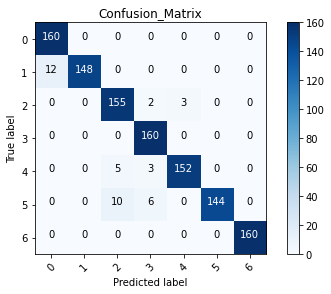

In [ ]:
cm_plot_labels =['0','1','2','3','4','5','6']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion_Matrix')

In [ ]:
from sklearn.metrics import accuracy_score
y_true = test_batch.classes
y_pred = np.argmax(prediction,axis=-1)
Acc = accuracy_score(y_true, y_pred, normalize=True)*100
print('Evaluation Accuracy = %f '% Acc)

Evaluation Accuracy = 96.339286 


In [ ]:
from sklearn.metrics import classification_report
# Print the precision and recall, among other metrics
print(classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.930     1.000     0.964       160
           1      1.000     0.925     0.961       160
           2      0.912     0.969     0.939       160
           3      0.936     1.000     0.967       160
           4      0.981     0.950     0.965       160
           5      1.000     0.900     0.947       160
           6      1.000     1.000     1.000       160

    accuracy                          0.963      1120
   macro avg      0.965     0.963     0.963      1120
weighted avg      0.965     0.963     0.963      1120



In [ ]:
test = model.evaluate(x=test_batch, verbose = 1)